In [1]:
import desitarget 
from astropy.table import Table
import numpy as np
import pylab as pl #form of matplotlib
import matplotlib.pyplot as plt
from desitarget.targets import desi_mask, bgs_mask, mws_mask
from desitarget.targetmask import zwarn_mask

In [2]:
desitarget.__file__ #where does the python package exist

'/global/common/software/desi/perlmutter/desiconda/20220119-2.0.1/code/desitarget/2.4.0/lib/python3.9/site-packages/desitarget/__init__.py'

In [3]:
desitarget.__version__

'2.4.0'

In [4]:
! echo $DESI_ROOT #! does a command line command, echo is print, $ is a bash variable

/global/cfs/cdirs/desi


In [5]:
! ls /global/cfs/cdirs/desi/spectro/redux
#releases of desi data names after mountains, fuji until end of SV, guadalupe main survey data
# https://desi.lbl.gov/trac/wiki/Pipeline/Releases

alpha-3		      fuji			      oldbias
alxogm		      fujilupe			      old_tiles_314_315
andes		      guadalupe			      pdaily
backup-daily	      himalayas			      pine_214ae69
bgs-specsim-paper-kr  ioannis			      plawton
blanc		      jguy			      prodruntest
blanctest	      jguy-adjust-sky-line-amplitude  QL
bolton		      jguy-main			      README.html
bweaver		      jguy-skycorr		      rstaten
cascades	      jguy-skycorr2		      rthomas
cpugpu-cknl	      jguy-skysub-fix		      schlafly
daily		      jguy-tile-qa		      select
daily2		      jiaxi			      sgontcho_skyfibers
daily_manager_test    jlasker			      sjb
dailytest	      kremin			      sjbailey
dataqa-tutorial       kremin_daily		      sky
dc3c		      kremin_test		      sky_traceshift
debug		      m31testing		      skyvarissue
deep-fuji	      malvarez			      srheft
denali		      martini			      stdstar
desi		      minicascades		      stephey
dither		      minisv0			      test
dmargala	      minisv0a			      test_20pt4
elm		      

In [6]:
! ls /global/cfs/cdirs/desi/spectro/redux/guadalupe
#exposures - raw data
#tiles - what order we observed, etc, info on conditions for that part of sky
#zcatalog ! - redshifts

calibnight		  healpix		     tiles
exposures		  preproc		     tiles-guadalupe.csv
exposures-guadalupe.csv   processing_tables	     tiles-guadalupe.fits
exposures-guadalupe.fits  redux_guadalupe.sha256sum  zcatalog
exposure_tables		  run


In [7]:
! ls /global/cfs/cdirs/desi/spectro/redux/guadalupe/zcatalog
#zall - combination of everything
#zpix - split up by healpixel

redux_guadalupe_zcatalog.sha256sum  ztile-main-dark-cumulative.fits
zall-pix-guadalupe.fits		    ztile-main-dark-perexp.fits
zall-tilecumulative-guadalupe.fits  ztile-main-dark-pernight.fits
zpix-main-bright.fits		    ztile-special-bright-cumulative.fits
zpix-main-dark.fits		    ztile-special-bright-perexp.fits
zpix-special-bright.fits	    ztile-special-bright-pernight.fits
zpix-special-dark.fits		    ztile-special-dark-cumulative.fits
ztile-main-bright-cumulative.fits   ztile-special-dark-perexp.fits
ztile-main-bright-perexp.fits	    ztile-special-dark-pernight.fits
ztile-main-bright-pernight.fits


In [8]:
data = Table.read('/global/cfs/cdirs/desi/spectro/redux/guadalupe/zcatalog/zpix-main-bright.fits')
data['MW_TRANSMISSION_R'] = float(0.0)
data['MW_TRANSMISSION_G'] = float(0.0)
data['MW_TRANSMISSION_Z'] = float(0.0)
data['MW_TRANSMISSION_W1'] = float(0.0)
data['G_MAG'] = float(0.0)
data['R_MAG'] = float(0.0)
data['Z_MAG'] = float(0.0)
data['W1_MAG'] = float(0.0)
data['R_FIBER_MAG'] = float(0.0)
data['R_RAW_MAG'] = float(0.0)
data

TARGETID,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF [10],NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZCAT_NSPEC,ZCAT_PRIMARY,MW_TRANSMISSION_R,MW_TRANSMISSION_G,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,G_MAG,R_MAG,Z_MAG,W1_MAG,R_FIBER_MAG,R_RAW_MAG
int64,int32,int32,float64,float64,int64,float64,float64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39633192419853982,10000,10000,0.03768131081242892,3.852061824477527e-06,0,7679.1721932291985,1039.3360306625157 .. 8.300501709219164,7906,GALAXY,--,10,2130.768586933613,0,252.92687803206968,46.536735591055674,0.0,0.0,2015.5,1152921504606846976,1,TGT,0.850263393143325,516,9011,2529p465,571086,1694,SER,0.019520197,15.28663,21.711166,26.56284,14.621476,5.1932435,133.69522,35.29861,26.31763,4.764854,1.6115698,3.9004745,5.539733,6.7776666,3.9004745,5.539733,6.7776666,0,0.7186158,1.2290907,-0.018304463,-0.16170786,0,--,0.0,0.0,0.0,0.0,N,2100,2,1152921504606846976,514,0,0,252.92687803206968,46.536735591055674,1,442.5022,1,1,0.001,0.001,-0.007,0.007,252.92688117445672,0.0,46.536762685656484,0.0,0.73440033,44.85684,0.019960195,8.332401,14.4543915,110.51578,64.62738,0.52926874,0.21445554,1278.6799,3.6977777,237.06061,0.0029788588,223.63417,1844.7067,0.9251271,4.811232,5.4636785e-06,13.7044935,1.0073055e-06,0.0,765.85925,7.670622e-06,3.1385128,7.3677464,1323.5367,17.422232,245.393,14.457371,1100.0093,1909.334,4.592909,12.393435,1,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39633188250716069,10001,10001,-0.0006552097456118187,4.67384942041175e-06,0,12244.191531231718,5921.738780264827 .. 0.0,7862,STAR,K,5,3798.6610474082663,0,253.59857556877355,46.245138036902944,-1.1106461,-0.89099985,2015.5,2305843009213693952,1,TGT,0.9320531634626462,516,9011,2536p462,570092,1957,PSF,0.018271104,57.748344,109.608086,152.16661,58.416958,30.096806,44.69639,19.042627,20.306168,3.4689436,1.5110312,44.96402,85.343056,118.47998,44.96402,85.343056,118.47998,0,0.0,0.0,0.0,0.0,1407530876765981184,G2,17.518497,18.006369,16.866531,0.035543706,N,15

In [9]:
data.dtype.names

('TARGETID',
 'HEALPIX',
 'SPGRPVAL',
 'Z',
 'ZERR',
 'ZWARN',
 'CHI2',
 'COEFF',
 'NPIXELS',
 'SPECTYPE',
 'SUBTYPE',
 'NCOEFF',
 'DELTACHI2',
 'COADD_FIBERSTATUS',
 'TARGET_RA',
 'TARGET_DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'FA_TARGET',
 'FA_TYPE',
 'OBJTYPE',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'RELEASE',
 'BRICKNAME',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'MASKBITS',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'PHOTSYS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'SCND_TARGET',
 'PLATE_RA',
 'PLATE_DEC',
 'COADD_NUMEXP',
 'COADD_EXPTIME',
 'COADD_NUMNIGHT',
 'COADD_NUMTILE'

## todo

'revision' - process everything
read SV in more detail, make plots - magnitude distribtions, galaxy colours etc  r - g (ext. correc.)
target selection - bits and bitmasks !! - need to select out BGS Bright targets by querying bitmasks
    https://github.com/desihub/desitarget/blob/main/doc/nb/target-selection-bits-and-bitmasks.ipynb
    
want to understand plots in SV paper and implement some

In [10]:
#print(data['DESI_TARGET'])
print(np.where((data["DESI_TARGET"] & desi_mask["BGS_ANY"]) != 0)[0][0:10]) #indices of bgs_any in desi target
#print(data['BGS_TARGET'])
bgs_bright_i = np.where((data["BGS_TARGET"] & bgs_mask["BGS_BRIGHT"]) != 0)[0]
print(bgs_bright_i)
bgs_faint_i = np.where((data["BGS_TARGET"] & bgs_mask["BGS_FAINT"]) != 0)[0]
print(bgs_faint_i)
mws_i = np.where((data["MWS_TARGET"]))[0]
print(mws_i[0:10])

[ 0  2  3  7  8  9 10 14 17 19]
[      0       2       7 ... 1693741 1693742 1693746]
[      3      10      17 ... 1693725 1693732 1693747]
[ 1  6 12 20 25 41 43 46 49 57]


In [11]:
names = desi_mask.names()
bitnums = [desi_mask.bitnum(name) for name in names]
bitvals = [desi_mask[name] for name in names]
list(zip(names,bitnums,bitvals)) # ADM the bit and integer value for each defined name.

[('LRG', 0, 1),
 ('ELG', 1, 2),
 ('QSO', 2, 4),
 ('QSO_HIZ', 4, 16),
 ('ELG_LOP', 5, 32),
 ('ELG_HIP', 6, 64),
 ('ELG_VLO', 7, 128),
 ('LRG_NORTH', 8, 256),
 ('ELG_NORTH', 9, 512),
 ('QSO_NORTH', 10, 1024),
 ('ELG_LOP_NORTH', 11, 2048),
 ('ELG_VLO_NORTH', 12, 4096),
 ('LRG_SOUTH', 16, 65536),
 ('ELG_SOUTH', 17, 131072),
 ('QSO_SOUTH', 18, 262144),
 ('ELG_LOP_SOUTH', 19, 524288),
 ('ELG_VLO_SOUTH', 20, 1048576),
 ('SKY', 32, 4294967296),
 ('STD_FAINT', 33, 8589934592),
 ('STD_WD', 34, 17179869184),
 ('STD_BRIGHT', 35, 34359738368),
 ('BAD_SKY', 36, 68719476736),
 ('SUPP_SKY', 37, 137438953472),
 ('NO_TARGET', 49, 562949953421312),
 ('BRIGHT_OBJECT', 50, 1125899906842624),
 ('IN_BRIGHT_OBJECT', 51, 2251799813685248),
 ('NEAR_BRIGHT_OBJECT', 52, 4503599627370496),
 ('BGS_ANY', 60, 1152921504606846976),
 ('MWS_ANY', 61, 2305843009213693952),
 ('SCND_ANY', 62, 4611686018427387904)]

In [12]:
names = bgs_mask.names()
bitnums = [bgs_mask.bitnum(name) for name in names]
bitvals = [bgs_mask[name] for name in names]
list(zip(names,bitnums,bitvals)) # ADM the bit and integer value for each defined name.

[('BGS_FAINT', 0, 1),
 ('BGS_BRIGHT', 1, 2),
 ('BGS_WISE', 2, 4),
 ('BGS_FAINT_HIP', 3, 8),
 ('BGS_FAINT_NORTH', 8, 256),
 ('BGS_BRIGHT_NORTH', 9, 512),
 ('BGS_WISE_NORTH', 10, 1024),
 ('BGS_FAINT_SOUTH', 16, 65536),
 ('BGS_BRIGHT_SOUTH', 17, 131072),
 ('BGS_WISE_SOUTH', 18, 262144)]

In [13]:
names = mws_mask.names()
bitnums = [mws_mask.bitnum(name) for name in names]
bitvals = [mws_mask[name] for name in names]
list(zip(names,bitnums,bitvals)) # ADM the bit and integer value for each defined name.

[('MWS_BROAD', 0, 1),
 ('MWS_WD', 1, 2),
 ('MWS_NEARBY', 2, 4),
 ('MWS_BROAD_NORTH', 4, 16),
 ('MWS_BROAD_SOUTH', 5, 32),
 ('MWS_BHB', 6, 64),
 ('MWS_MAIN_BLUE', 8, 256),
 ('MWS_MAIN_BLUE_NORTH', 9, 512),
 ('MWS_MAIN_BLUE_SOUTH', 10, 1024),
 ('MWS_MAIN_RED', 11, 2048),
 ('MWS_MAIN_RED_NORTH', 12, 4096),
 ('MWS_MAIN_RED_SOUTH', 13, 8192),
 ('MWS_FAINT_BLUE', 14, 16384),
 ('MWS_FAINT_BLUE_NORTH', 15, 32768),
 ('MWS_FAINT_BLUE_SOUTH', 16, 65536),
 ('MWS_FAINT_RED', 17, 131072),
 ('MWS_FAINT_RED_NORTH', 18, 262144),
 ('MWS_FAINT_RED_SOUTH', 19, 524288),
 ('GAIA_STD_FAINT', 33, 8589934592),
 ('GAIA_STD_WD', 34, 17179869184),
 ('GAIA_STD_BRIGHT', 35, 34359738368),
 ('BACKUP_GIANT_LOP', 58, 288230376151711744),
 ('BACKUP_GIANT', 59, 576460752303423488),
 ('BACKUP_BRIGHT', 60, 1152921504606846976),
 ('BACKUP_FAINT', 61, 2305843009213693952),
 ('BACKUP_VERY_FAINT', 62, 4611686018427387904)]

In [14]:
names = zwarn_mask.names()
bitnums = [zwarn_mask.bitnum(name) for name in names]
bitvals = [zwarn_mask[name] for name in names]
list(zip(names,bitnums,bitvals)) # ADM the bit and integer value for each defined name.
zwarn_mask.names(2053)

['SKY', 'SMALL_DELTA_CHI2', 'POORDATA']

In [15]:
print(np.where(data['BGS_TARGET'] & zwarn_mask['SKY'] != 0)[0])
print(np.where(data['BGS_TARGET'] & zwarn_mask['LITTLE_COVERAGE'] != 0)[0])

[      3      10      17 ... 1693725 1693732 1693747]
[      0       2       7 ... 1693741 1693742 1693746]


In [16]:
data_BGS = Table()
data_BGS_faint = Table()
from desiutil.dust import mwdust_transmission as mwdust

In [17]:
data['PHOTSYS'] = np.array(data['PHOTSYS'],dtype='U4')
print(np.array(data['PHOTSYS']))

['N' 'N' 'N' ... 'N' '' '']


In [18]:
def clip_flux(flux_col):
    i = np.where(flux_col < 10**-16)[0]
    flux_col[i] = 10**-16
    return flux_col

In [19]:
photsys_valid = np.where(np.logical_or(data['PHOTSYS']=='N',data['PHOTSYS']=='S',data['PHOTSYS']=='G'))[0]
#removes sky targets
data['MW_TRANSMISSION_R'][photsys_valid] = mwdust(data['EBV'][photsys_valid], 'R', data['PHOTSYS'][photsys_valid]) 
data['MW_TRANSMISSION_G'][photsys_valid] = mwdust(data['EBV'][photsys_valid], 'G', data['PHOTSYS'][photsys_valid]) 
data['MW_TRANSMISSION_Z'][photsys_valid] = mwdust(data['EBV'][photsys_valid], 'Z', data['PHOTSYS'][photsys_valid]) 
data['MW_TRANSMISSION_W1'][photsys_valid] = mwdust(data['EBV'][photsys_valid], 'W1', data['PHOTSYS'][photsys_valid]) 

In [20]:
print(bgs_bright_i[0:100])
data_BGS['RA'] = data['TARGET_RA'][bgs_bright_i]
data_BGS['DEC'] = data['TARGET_DEC'][bgs_bright_i]

data_BGS['Z'] = data['Z'][bgs_bright_i]
data_BGS['DELTACHI2'] = data['DELTACHI2'][bgs_bright_i]
data_BGS['ZWARN'] = data['ZWARN'][bgs_bright_i]

data_BGS['FLUX_G'] = clip_flux(data['FLUX_G'][bgs_bright_i])
data_BGS['FLUX_R'] = clip_flux(data['FLUX_R'][bgs_bright_i])
data_BGS['FLUX_Z'] = clip_flux(data['FLUX_Z'][bgs_bright_i])
data_BGS['FLUX_W1'] = clip_flux(data['FLUX_W1'][bgs_bright_i])
data_BGS['FIBERFLUX_R'] = clip_flux(data['FIBERFLUX_R'][bgs_bright_i])
data_BGS['GAIA_PHOT_G_MEAN_MAG'] = data['GAIA_PHOT_G_MEAN_MAG'][bgs_bright_i]

data_BGS['EBV'] = data['EBV'][bgs_bright_i]
data_BGS['PHOTSYS'] = np.array(data['PHOTSYS'][bgs_bright_i],dtype='U4')

data_BGS['MW_TRANSMISSION_R'] = mwdust(data_BGS['EBV'], 'R', data_BGS['PHOTSYS']) 
data_BGS['MW_TRANSMISSION_G'] = mwdust(data_BGS['EBV'], 'G', data_BGS['PHOTSYS']) 
data_BGS['MW_TRANSMISSION_Z'] = mwdust(data_BGS['EBV'], 'Z', data_BGS['PHOTSYS']) 
data_BGS['MW_TRANSMISSION_W1'] = mwdust(data_BGS['EBV'], 'W1', data_BGS['PHOTSYS']) 

data_BGS #BGS BRIGHT

[  0   2   7   8   9  14  19  21  22  24  27  28  30  31  32  34  36  38
  40  42  45  50  51  52  53  55  58  60  62  63  64  65  68  69  71  72
  73  74  75  76  77  78  83  84  86  91  92  93  94  95  97  99 100 102
 104 105 106 107 108 110 112 113 114 115 117 118 119 125 126 129 133 134
 137 138 143 144 146 148 152 153 155 156 157 160 161 164 167 168 171 172
 173 174 175 176 178 179 180 183 184 185]


RA,DEC,Z,DELTACHI2,ZWARN,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FIBERFLUX_R,GAIA_PHOT_G_MEAN_MAG,EBV,PHOTSYS,MW_TRANSMISSION_R,MW_TRANSMISSION_G,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1
float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,str4,float64,float64,float64,float64
252.92687803206968,46.536735591055674,0.03768131081242892,2130.768586933613,0,15.28663,21.711166,26.56284,14.621476,5.539733,0.0,0.019520197,N,0.961633563041687,0.9431076645851135,0.9786741137504578,0.9966973662376404
253.3883175890437,46.13916021306366,0.2460835153758476,82.70370354130864,0,5.4663215,15.62286,30.758135,37.486607,3.26027,0.0,0.018015157,N,0.96453857421875,0.9473766088485718,0.980302095413208,0.9969516396522522
253.51463336528474,46.09234093377972,0.18949029199260112,569.461139768362,0,11.675276,26.277279,45.331238,41.163414,10.669796,0.0,0.017417613,N,0.9656943678855896,0.9490768313407898,0.9809491634368896,0.9970526099205017
253.4956175039726,46.15739279117302,0.13372067018843709,3981.04279499501,0,80.86853,209.48013,385.7725,341.62036,63.781494,18.48371,0.017567316,N,0.9654046893119812,0.948650598526001,0.9807870388031006,0.9970272779464722
253.41223584682092,46.17320751334843,0.45165661725352163,433.8810201063752,0,11.191165,34.252174,67.620674,109.840805,7.526166,0.0,0.018026156,N,0.9645172953605652,0.9473453164100647,0.9802901744842529,0.9969497919082642
253.57217994384067,46.09795214905402,0.270682916567217,298.5191029217094,0,4.480545,18.680002,38.422207,48.663876,9.283437,0.0,0.017021973,N,0.9664604067802429,0.9502042531967163,0.981377899646759,0.9971194267272949
253.55885640223556,46.223840981883576,0.07647416383063638,1410.7242206037045,0,25.689669,43.492794,63.73545,45.247345,9.872389,0.0,0.017612023,N,0.9653182029724121,0.9485233426094055,0.980738639831543,0.9970197081565857
253.5639598213845,46.233230791757805,0.03687310531300927,2077.76135228388,0,66.705185,109.13154,151.53752,95.64898,10.190221,0.0,0.017700506,N,0.9651470184326172,0.9482715129852295,0.9806427955627441,0.9970048069953918
253.46611522066826,46.14318099327844,0.04559773969242534,3192.7016885225894,0,34.108765,54.27098,72.09357,45.54539,8.416039,0.0,0.017656086,N,0.9652329683303833,0.9483979344367981,0.9806908965110779,0.9970123171806335


In [21]:
print(bgs_faint_i[0:100])
data_BGS_faint['RA'] = data['TARGET_RA'][bgs_faint_i]
data_BGS_faint['DEC'] = data['TARGET_DEC'][bgs_faint_i]

data_BGS_faint['Z'] = data['Z'][bgs_faint_i]
data_BGS_faint['DELTACHI2'] = data['DELTACHI2'][bgs_faint_i]
data_BGS_faint['ZWARN'] = data['ZWARN'][bgs_faint_i]

data_BGS_faint['FLUX_G'] = clip_flux(data['FLUX_G'][bgs_faint_i])
data_BGS_faint['FLUX_R'] = clip_flux(data['FLUX_R'][bgs_faint_i])
data_BGS_faint['FLUX_Z'] = clip_flux(data['FLUX_Z'][bgs_faint_i])
data_BGS_faint['FLUX_W1'] = clip_flux(data['FLUX_W1'][bgs_faint_i])
data_BGS_faint['FIBERFLUX_R'] = clip_flux(data['FIBERFLUX_R'][bgs_faint_i])
data_BGS_faint['GAIA_PHOT_G_MEAN_MAG'] = data['GAIA_PHOT_G_MEAN_MAG'][bgs_faint_i]

data_BGS_faint['EBV'] = data['EBV'][bgs_faint_i]
data_BGS_faint['PHOTSYS'] = np.array(data['PHOTSYS'][bgs_faint_i],dtype='U4')

data_BGS_faint['MW_TRANSMISSION_R'] = mwdust(data_BGS_faint['EBV'], 'R', data_BGS_faint['PHOTSYS']) 
data_BGS_faint['MW_TRANSMISSION_G'] = mwdust(data_BGS_faint['EBV'], 'G', data_BGS_faint['PHOTSYS']) 
data_BGS_faint['MW_TRANSMISSION_Z'] = mwdust(data_BGS_faint['EBV'], 'Z', data_BGS_faint['PHOTSYS']) 
data_BGS_faint['MW_TRANSMISSION_W1'] = mwdust(data_BGS_faint['EBV'], 'W1', data_BGS_faint['PHOTSYS']) 

data_BGS_faint

[  3  10  17  33  37  39  47  48  61  66  67  85  89  96 101 103 109 111
 120 122 124 132 139 140 149 159 165 182 190 200 203 207 209 213 216 219
 225 231 232 237 240 247 250 251 259 261 262 265 268 270 282 284 295 303
 306 308 314 324 326 331 344 350 351 354 357 359 369 390 391 394 397 399
 400 402 406 418 426 437 445 447 451 454 456 460 463 467 471 484 488 499
 504 508 513 519 520 543 553 556 557 563]


RA,DEC,Z,DELTACHI2,ZWARN,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FIBERFLUX_R,GAIA_PHOT_G_MEAN_MAG,EBV,PHOTSYS,MW_TRANSMISSION_R,MW_TRANSMISSION_G,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1
float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,str4,float64,float64,float64,float64
253.61567395297553,46.22384832111727,0.3648354644541231,156.26672565937042,0,5.7944336,14.67982,28.79129,87.14686,2.5959828,0.0,0.018253785,N,0.9640774130821228,0.9466984272003174,0.9800437688827515,0.9969112873077393
253.51457117096697,46.215863929344884,0.21685492212078814,2145.1981295347214,0,4.631336,10.276979,19.109667,26.697212,5.5397086,0.0,0.0174425,N,0.9656462073326111,0.9490059614181519,0.9809222221374512,0.9970483779907227
253.48589683818622,46.269581837842615,0.3649589127543193,200.64442791044712,0,2.6706824,7.8994045,17.396439,28.601995,3.265721,0.0,0.017372267,N,0.9657821655273438,0.9492059946060181,0.9809983372688293,0.997060239315033
254.40110516374057,46.57091346807357,0.2167515693987101,1874.2445800304413,0,6.2829924,10.712455,15.003787,11.248343,4.664464,0.0,0.022258606,N,0.9563703536987305,0.9353896975517273,0.9757190346717834,0.9962349534034729
254.35883189816587,46.63786775384007,0.46190874997008885,1066.1913056373596,0,3.6798258,9.189275,16.169027,25.059845,3.970422,0.0,0.025840731,N,0.9495289921760559,0.9253890514373779,0.9718669056892395,0.9956303238868713
254.22461371970707,46.62270185456701,5.0616854166023114e-05,23579.10492533642,0,2.6882198,13.36266,61.471287,76.54661,10.387491,0.0,0.02481886,N,0.9514756202697754,0.9282310009002686,0.9729642271995544,0.9958027601242065
254.26085823639045,46.55800408072675,0.23231386968387802,532.729374051094,0,5.728754,13.419539,22.875435,21.69198,5.3062315,0.0,0.022517882,N,0.9558735489845276,0.9346622228622437,0.9754396677017212,0.996191143989563
254.24140184850756,46.64697957308354,0.3843807023738926,3021.5231380462646,0,5.837717,12.042456,17.971205,17.71818,3.954253,0.0,0.026150038,N,0.9489405751228333,0.924530565738678,0.9715349674224854,0.9955781698226929
254.2442320901141,46.80769670827801,0.38542549086303113,312.7655062377453,0,4.475873,9.37912,14.720773,22.071201,3.231239,0.0,0.032713264,N,0.9365400671958923,0.9065005779266357,0.9645188450813293,0.9944714307785034


In [22]:
z_bad_bright = np.where((np.logical_or(data_BGS['ZWARN']!=0, data_BGS['DELTACHI2']<=40)))[0]
z_bad_faint = np.where(np.logical_or(data_BGS_faint['ZWARN']!=0, data_BGS_faint['DELTACHI2']<=40))[0]

z_good_bright = np.where(np.logical_and(data_BGS['ZWARN']==0, data_BGS['DELTACHI2']>40))[0]
z_good_faint = np.where(np.logical_and(data_BGS_faint['ZWARN']==0, data_BGS_faint['DELTACHI2']>40))[0]

print(z_good_faint)

[     0      1      2 ... 275805 275806 275809]


In [23]:
data_BGS['R_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_R']/data_BGS['MW_TRANSMISSION_R']))
data_BGS['G_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_G']/data_BGS['MW_TRANSMISSION_G']))
data_BGS['Z_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_Z']/data_BGS['MW_TRANSMISSION_Z']))
data_BGS['W1_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_W1']/data_BGS['MW_TRANSMISSION_W1']))
data_BGS['R_FIBER_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS['FIBERFLUX_R']/data_BGS['MW_TRANSMISSION_R'])) 

data_BGS_faint['R_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS_faint['FLUX_R']/data_BGS_faint['MW_TRANSMISSION_R']))
data_BGS_faint['G_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS_faint['FLUX_G']/data_BGS_faint['MW_TRANSMISSION_G']))
data_BGS_faint['Z_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS_faint['FLUX_Z']/data_BGS_faint['MW_TRANSMISSION_Z']))
data_BGS_faint['W1_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS_faint['FLUX_W1']/data_BGS_faint['MW_TRANSMISSION_W1']))
data_BGS_faint['R_FIBER_MAG'] = np.array(22.5 - 2.5*np.log10(data_BGS_faint['FIBERFLUX_R']/data_BGS_faint['MW_TRANSMISSION_R'])) 
             
data['G_MAG'][photsys_valid] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FLUX_G'][photsys_valid])/data['MW_TRANSMISSION_G'][photsys_valid]))
data['R_MAG'][photsys_valid] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FLUX_R'][photsys_valid])/data['MW_TRANSMISSION_R'][photsys_valid]))
data['R_RAW_MAG'] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FLUX_R'])))
data['Z_MAG'][photsys_valid] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FLUX_Z'][photsys_valid])/data['MW_TRANSMISSION_Z'][photsys_valid]))
data['W1_MAG'][photsys_valid] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FLUX_W1'][photsys_valid])/data['MW_TRANSMISSION_W1'][photsys_valid]))
data['R_FIBER_MAG'][photsys_valid] = np.array(22.5 - 2.5*np.log10(clip_flux(data['FIBERFLUX_R'][photsys_valid]/data['MW_TRANSMISSION_R'][photsys_valid])))

In [24]:
print(np.where(data_BGS['PHOTSYS']=='S')[0])

[ 27458  27459  27460 ... 807989 807990 807997]


'Extinction corrected r mag!'

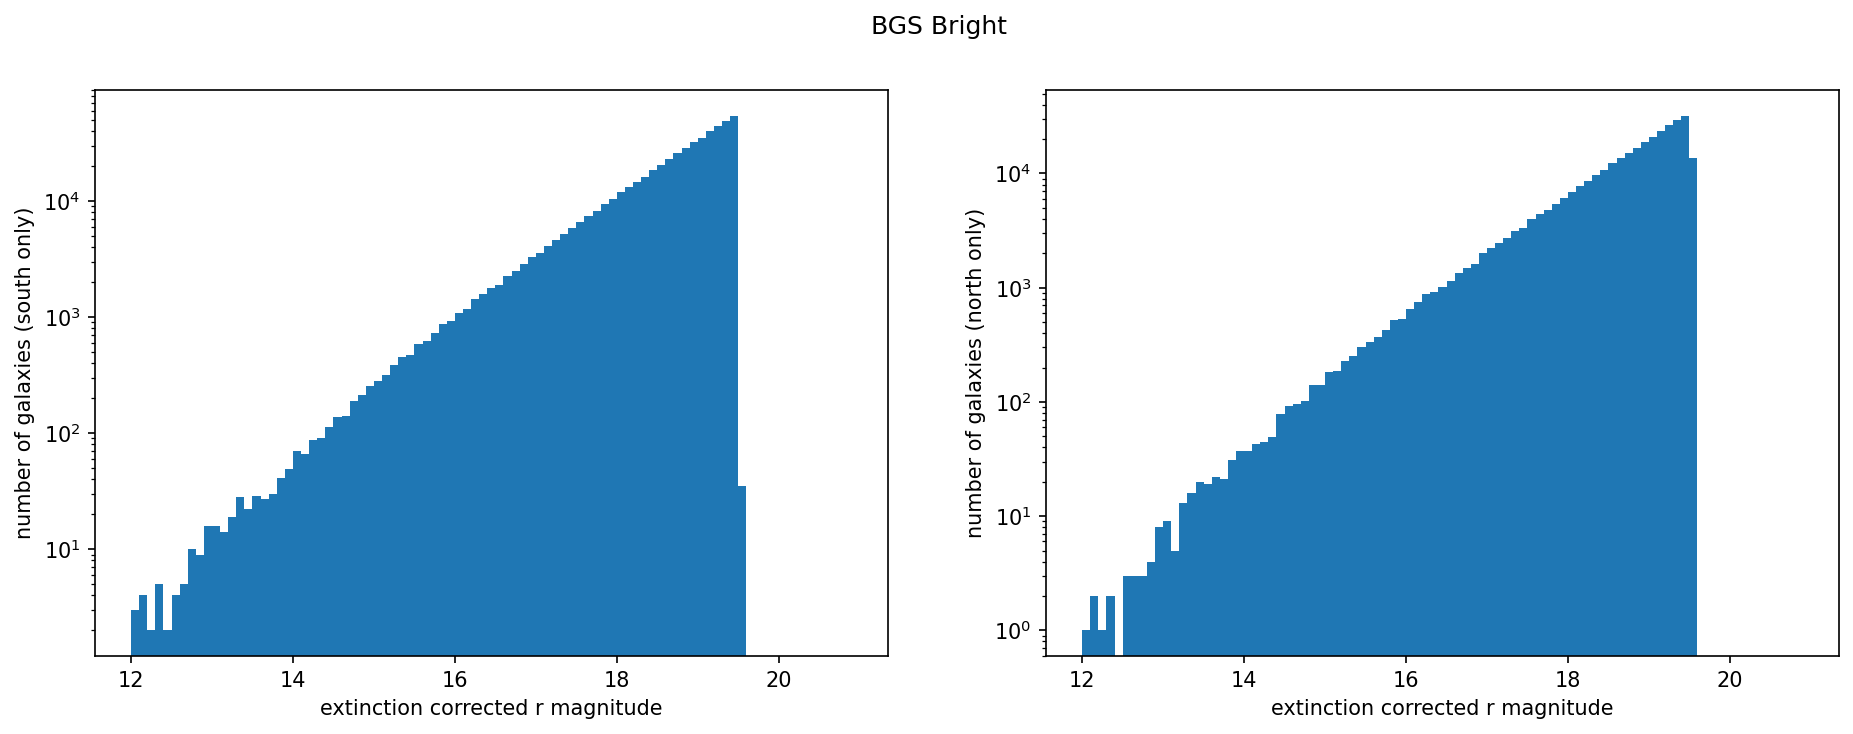

In [25]:
S = np.where(data_BGS['PHOTSYS']=='S')[0]
N = np.where(data_BGS['PHOTSYS']=='N')[0]
r_magnitude_s = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_R'][S]/data_BGS['MW_TRANSMISSION_R'][S]))
r_magnitude_n = np.array(22.5 - 2.5*np.log10(data_BGS['FLUX_R'][N]/data_BGS['MW_TRANSMISSION_R'][N]))
plt.figure(figsize=(15,5),dpi=150)
plt.suptitle('BGS Bright')
ax1 = plt.subplot(121)
ax1.hist(r_magnitude_s,bins=np.arange(12,21,0.1))
plt.xlabel('extinction corrected r magnitude')
plt.ylabel('number of galaxies (south only)')
ax1.set_yscale('log')
ax2 = plt.subplot(122)
ax2.hist(r_magnitude_n,bins=np.arange(12,21,0.1))
plt.xlabel('extinction corrected r magnitude')
plt.ylabel('number of galaxies (north only)')
ax2.set_yscale('log')
plt.savefig('figures/week1/mag_hist_log.png')
"""Extinction corrected r mag!"""

(840503,)


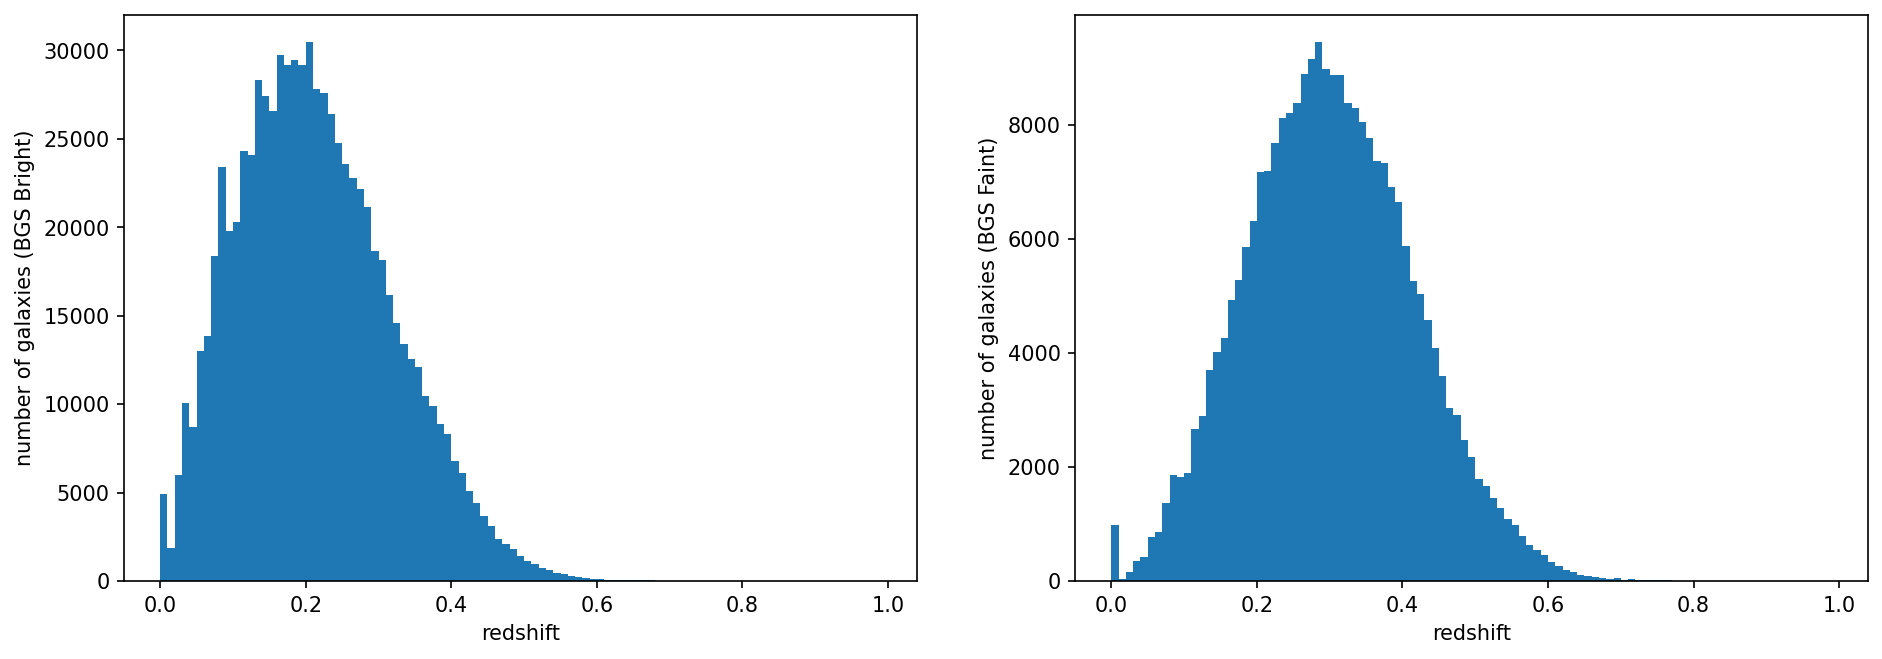

In [26]:
print(np.shape(data_BGS['Z']))
plt.figure(figsize=(15,5),dpi=150)
#plt.suptitle('BGS Bright')
ax1 = plt.subplot(121)
ax1.hist(data_BGS['Z'][z_good_bright], bins=np.arange(0,1,0.01))
plt.xlabel('redshift')
plt.ylabel('number of galaxies (BGS Bright)')
#ax1.set_yscale('log')
ax2 = plt.subplot(122)
ax2.hist(data_BGS_faint['Z'][z_good_faint], bins=np.arange(0,1,0.01))
plt.xlabel('redshift')
plt.ylabel('number of galaxies (BGS Faint)')
#ax2.set_yscale('log')
plt.savefig('figures/week1/redshift_hist.png')

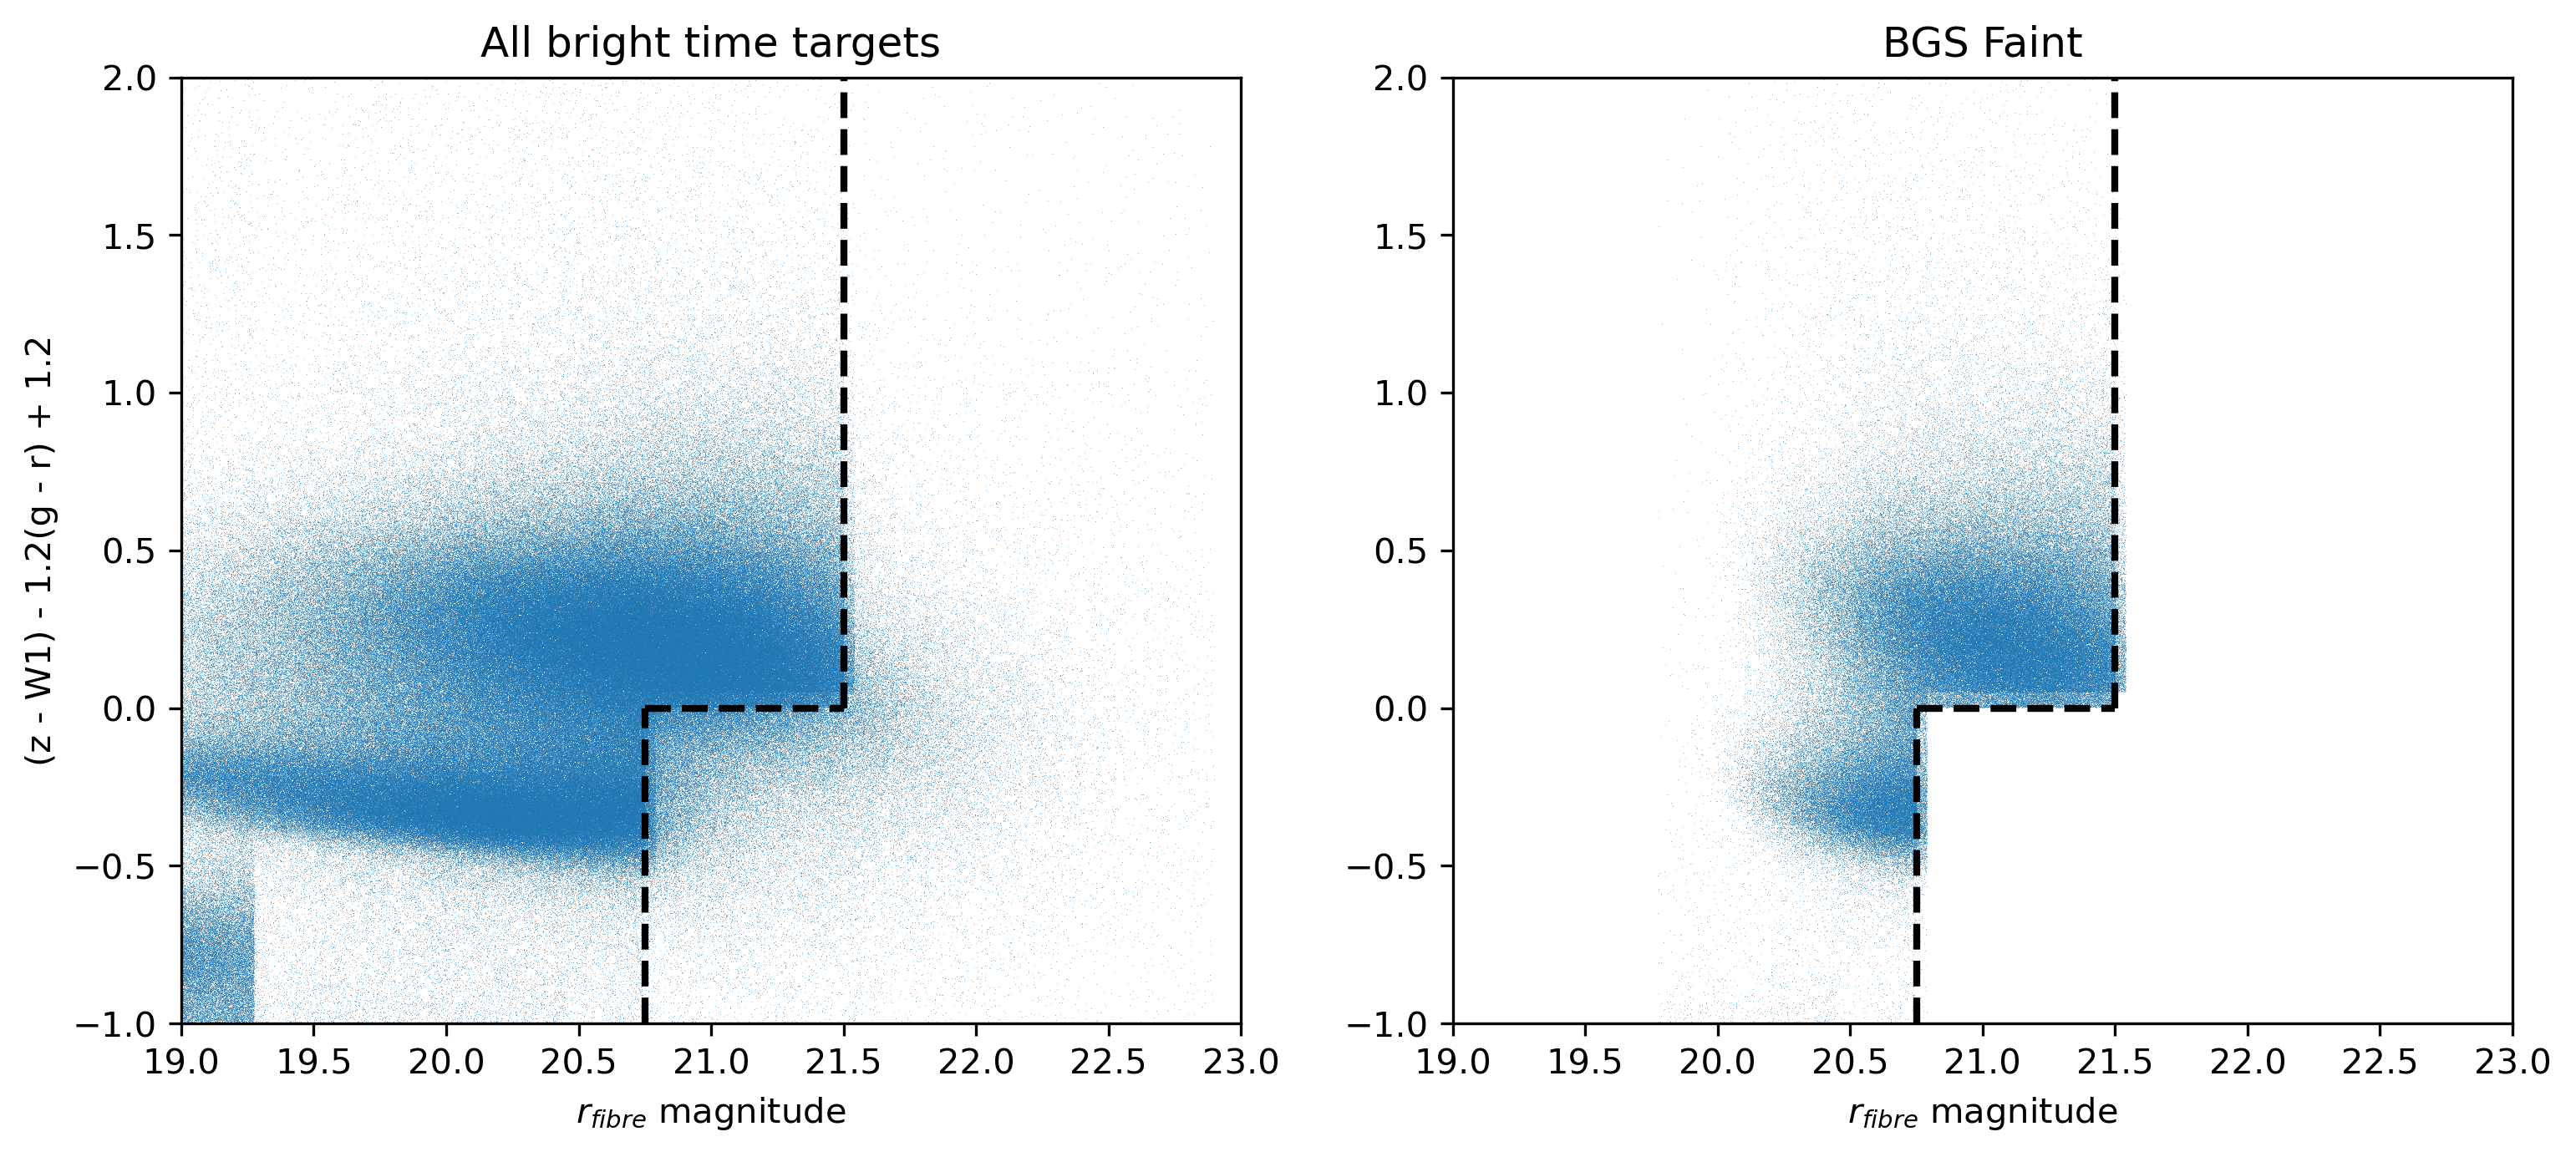

In [27]:
Y = (data_BGS['Z_MAG'] - data_BGS['W1_MAG']) - 1.2*(data_BGS['G_MAG'] - data_BGS['R_MAG']) + 1.2
Y_all = (data['Z_MAG'] - data['W1_MAG']) - 1.2*(data['G_MAG'] - data['R_MAG']) + 1.2
Y_faint = (data_BGS_faint['Z_MAG'] - data_BGS_faint['W1_MAG']) - 1.2*(data_BGS_faint['G_MAG'] - data_BGS_faint['R_MAG']) + 1.2

plt.figure(figsize=(12,5), dpi=300)

plt.subplot(121)
plt.title('All bright time targets')
plt.plot(data['R_FIBER_MAG'], Y_all, lw=0, marker=',', alpha=0.5)
plt.ylim((-1,2))
plt.xlim((19,23))
plt.plot([20.75,20.75],[-1,0],'k--', lw=2)
plt.plot([21.5,21.5],[0,2],'k--', lw=2)
plt.plot([20.75,21.5],[0,0],'k--', lw=2)
plt.ylabel('(z - W1) - 1.2(g - r) + 1.2')
"""
plt.subplot(132)
n=50
plt.title('BGS Bright')
plt.hist2d(r_fibre,Y,bins=(n,n), range=[[19,23],[-1,2]], cmap='Spectral_r')
plt.plot([20.75,20.75],[-1,0],'k--')
plt.plot([21.5,21.5],[0,2],'k--')
plt.plot([20.75,21.5],[0,0],'k--')"""
plt.xlabel('$r_{fibre}$ magnitude')
plt.subplot(122)
plt.title('BGS Faint')
#plt.hexbin(data_BGS_faint['R_FIBER_MAG'], Y_faint, gridsize=(18,370), cmap='Spectral_r', edgecolors='k', lw=0.5, mincnt=100)
plt.plot(data_BGS_faint['R_FIBER_MAG'], Y_faint, lw=0, marker=',', alpha=0.5)
plt.plot([20.75,20.75],[-1,0],'k--', lw=2)
plt.plot([21.5,21.5],[0,2],'k--', lw=2)
plt.plot([20.75,21.5],[0,0],'k--', lw=2)
plt.ylim((-1,2))
plt.xlim((19,23))
plt.xlabel('$r_{fibre}$ magnitude')
plt.savefig('figures/week1/Fig4_scatter.png')

In [28]:
print(mws_i, np.shape(data['R_FIBER_MAG']), np.shape(Y_all))

[      1       6      12 ... 1693729 1693743 1693744] (1693750,) (1693750,)


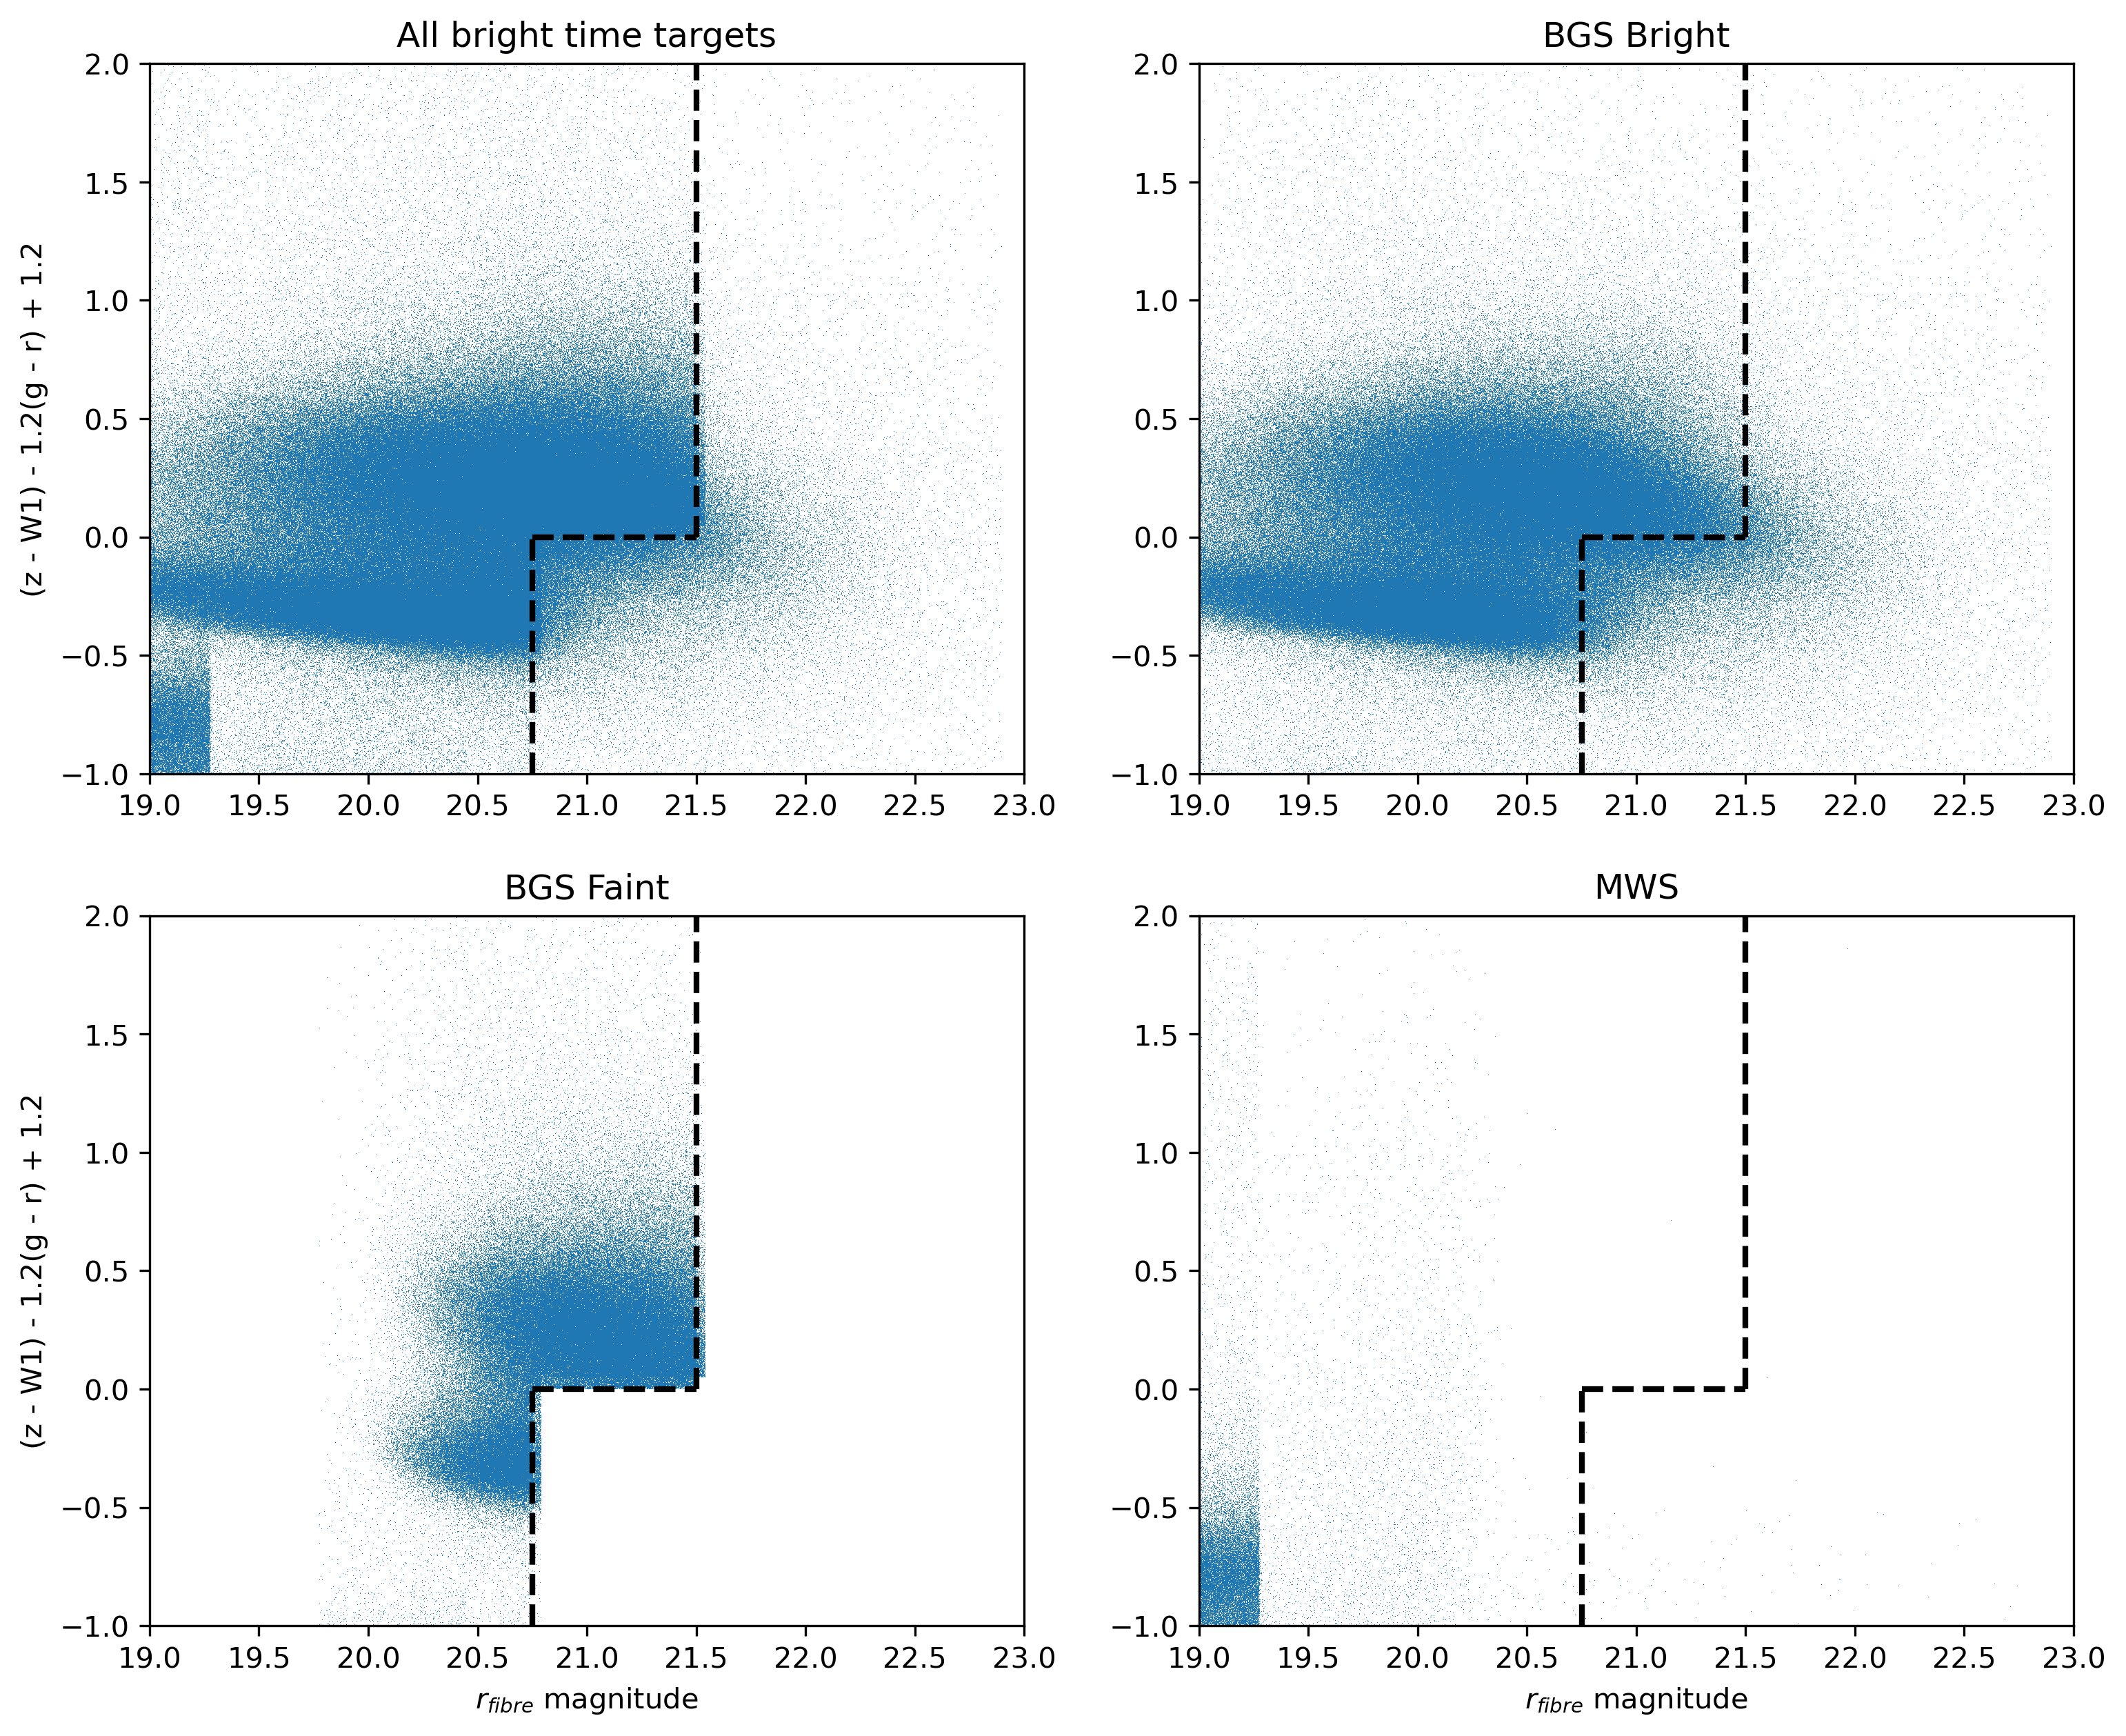

In [29]:
Y = (data_BGS['Z_MAG'] - data_BGS['W1_MAG']) - 1.2*(data_BGS['G_MAG'] - data_BGS['R_MAG']) + 1.2
Y_all = (data['Z_MAG'] - data['W1_MAG']) - 1.2*(data['G_MAG'] - data['R_MAG']) + 1.2
Y_faint = (data_BGS_faint['Z_MAG'] - data_BGS_faint['W1_MAG']) - 1.2*(data_BGS_faint['G_MAG'] - data_BGS_faint['R_MAG']) + 1.2

plt.figure(figsize=(12,10), dpi=300)

plt.subplot(221)
plt.title('All bright time targets')
plt.plot(data['R_FIBER_MAG'], Y_all, lw=0, marker=',')
plt.ylim((-1,2))
plt.xlim((19,23))
plt.plot([20.75,20.75],[-1,0],'k--', lw=2)
plt.plot([21.5,21.5],[0,2],'k--', lw=2)
plt.plot([20.75,21.5],[0,0],'k--', lw=2)
plt.ylabel('(z - W1) - 1.2(g - r) + 1.2')

plt.subplot(222)
plt.title('BGS Bright')
plt.plot(data_BGS['R_FIBER_MAG'], Y, lw=0, marker=',')
plt.plot([20.75,20.75],[-1,0],'k--', lw=2)
plt.plot([21.5,21.5],[0,2],'k--', lw=2)
plt.plot([20.75,21.5],[0,0],'k--', lw=2)
plt.ylim((-1,2))
plt.xlim((19,23))

plt.subplot(223)
plt.title('BGS Faint')
plt.plot(data_BGS_faint['R_FIBER_MAG'], Y_faint, lw=0, marker=',')
plt.plot([20.75,20.75],[-1,0],'k--', lw=2)
plt.plot([21.5,21.5],[0,2],'k--', lw=2)
plt.plot([20.75,21.5],[0,0],'k--', lw=2)
plt.ylim((-1,2))
plt.xlim((19,23))
plt.ylabel('(z - W1) - 1.2(g - r) + 1.2')
plt.xlabel('$r_{fibre}$ magnitude')

plt.subplot(224)
plt.title('MWS')
plt.plot(data['R_FIBER_MAG'][mws_i], Y_all[mws_i], lw=0, marker=',')
plt.plot([20.75,20.75],[-1,0],'k--', lw=2)
plt.plot([21.5,21.5],[0,2],'k--', lw=2)
plt.plot([20.75,21.5],[0,0],'k--', lw=2)
plt.ylim((-1,2))
plt.xlim((19,23))

plt.xlabel('$r_{fibre}$ magnitude')
plt.savefig('figures/week1/Fig4_split.png')

[     0      1      2 ... 275807 275808 275809] (275810,)


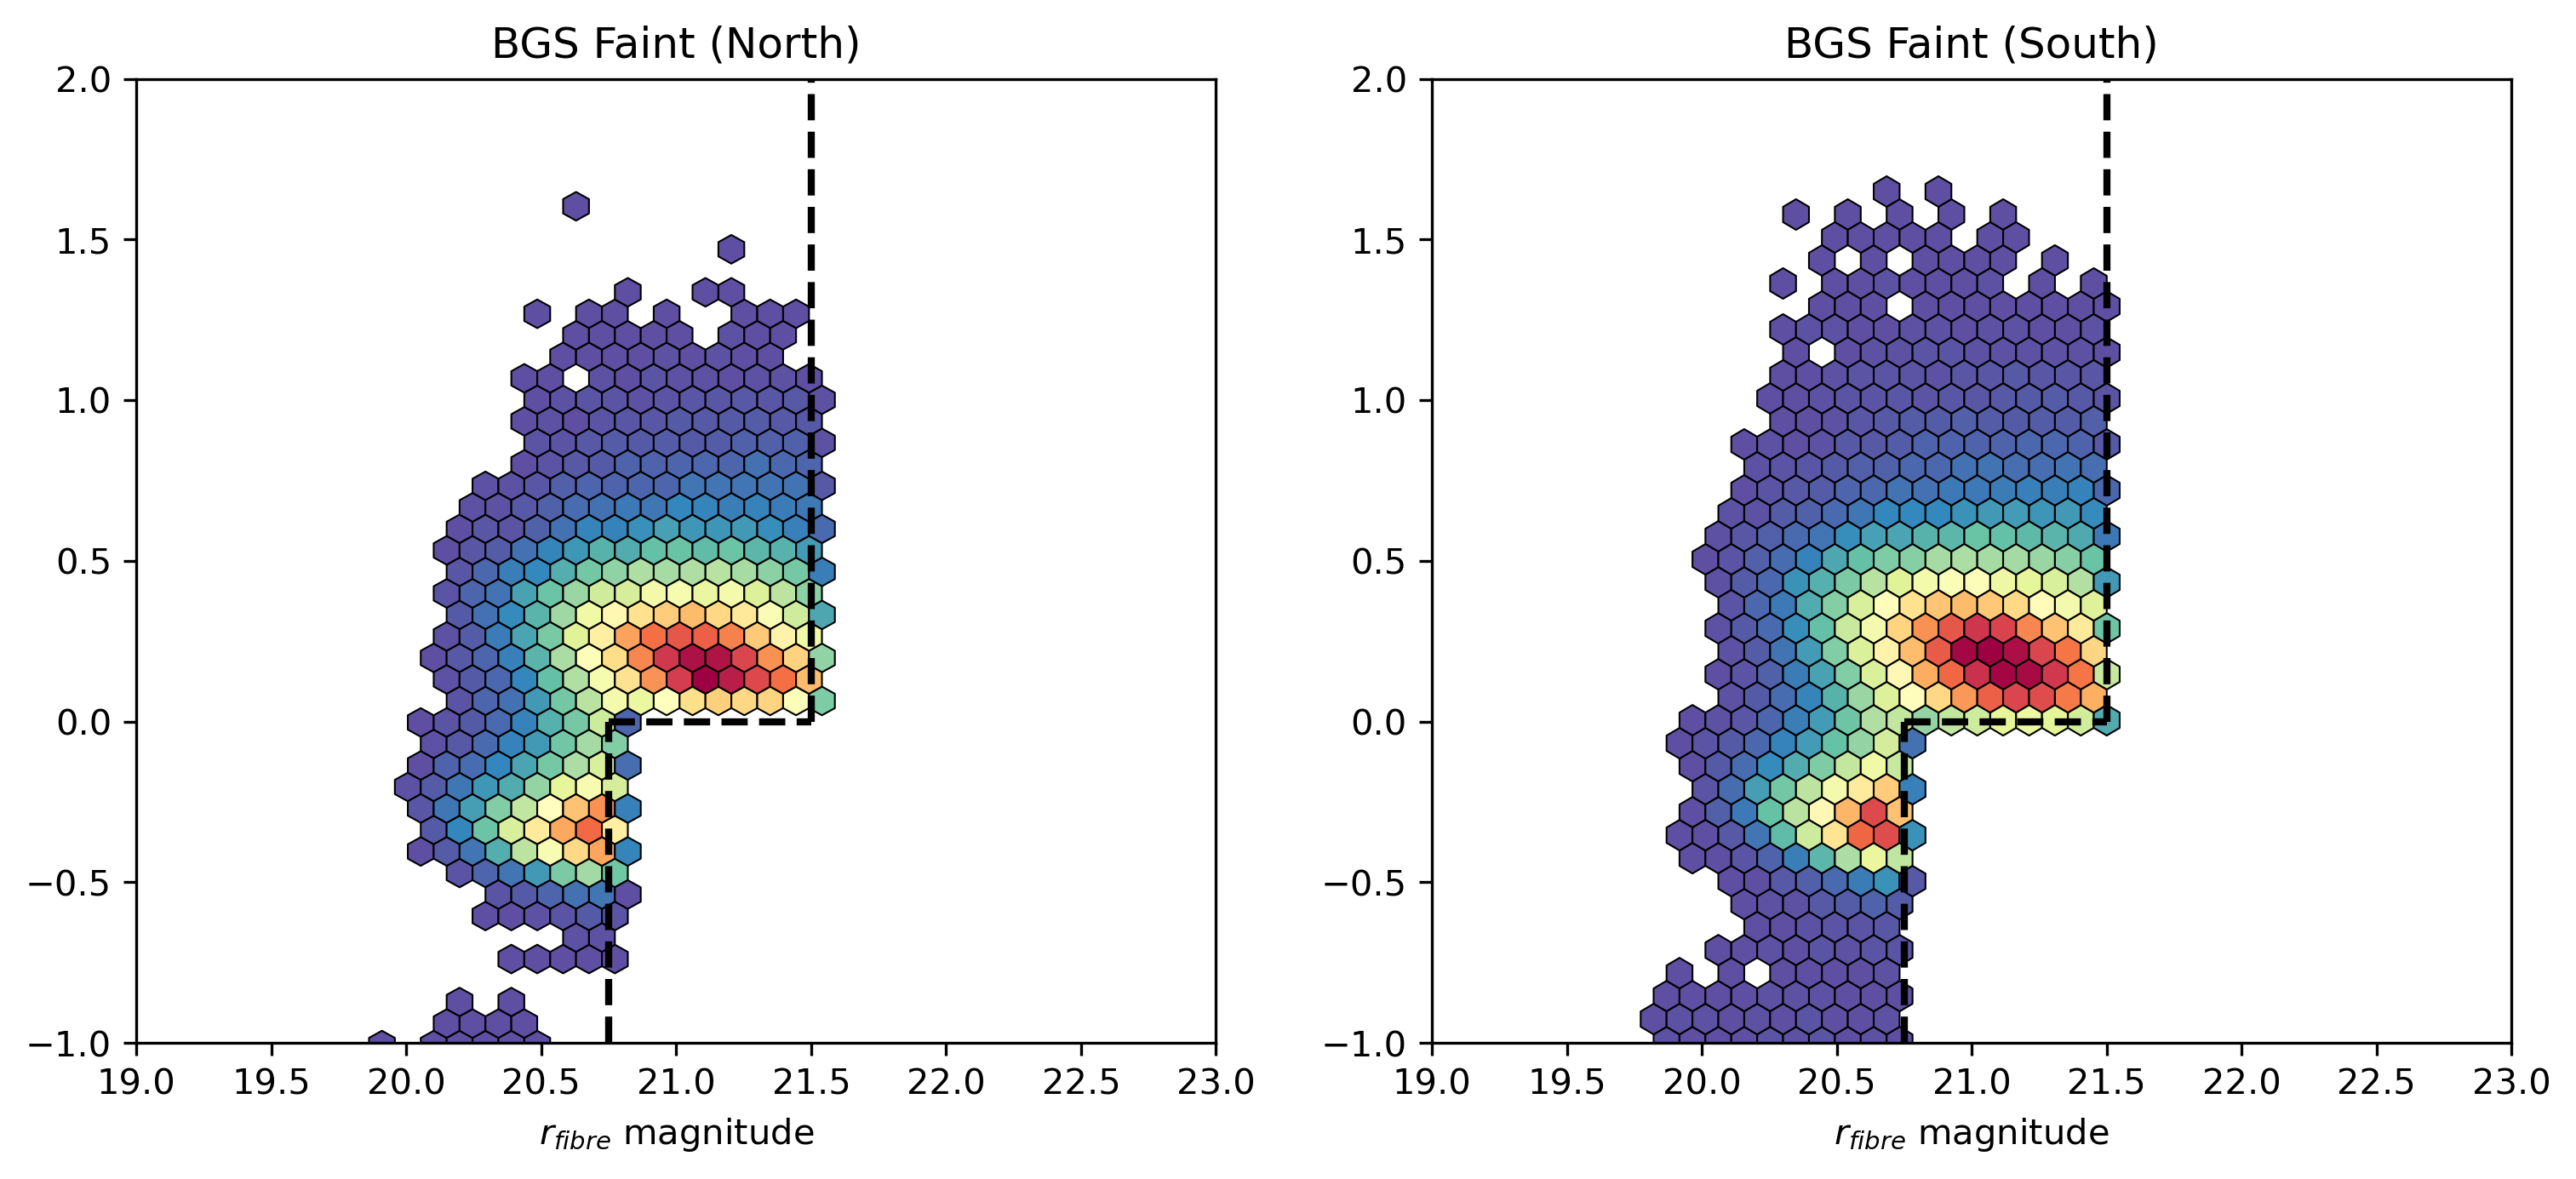

In [30]:
S_bright = np.where(data_BGS['PHOTSYS']=='S')[0]
N_bright = np.where(data_BGS['PHOTSYS']=='N')[0]

S_faint = np.where(data_BGS_faint['PHOTSYS']=='S')[0]
N_faint = np.where(data_BGS_faint['PHOTSYS']=='N')[0]
print(N_faint, np.shape(data_BGS_faint))

Y = (data_BGS['Z_MAG'] - data_BGS['W1_MAG']) - 1.2*(data_BGS['G_MAG'] - data_BGS['R_MAG']) + 1.2
Y_all = (data['Z_MAG'] - data['W1_MAG']) - 1.2*(data['G_MAG'] - data['R_MAG']) + 1.2
Y_faint = (data_BGS_faint['Z_MAG'] - data_BGS_faint['W1_MAG']) - 1.2*(data_BGS_faint['G_MAG'] - data_BGS_faint['R_MAG']) + 1.2

plt.figure(figsize=(12,5), dpi=300)

plt.subplot(121)
plt.title('BGS Faint (North)')
plt.hexbin(data_BGS_faint['R_FIBER_MAG'][N_faint], Y_faint[N_faint], gridsize=(18,370), cmap='Spectral_r', edgecolors='k', lw=0.5, mincnt=10)
#plt.scatter(data_BGS_faint['R_FIBER_MAG'][N_faint], Y_faint[N_faint], s=0.01)
plt.plot([20.75,20.75],[-1,0],'k--', lw=2)
plt.plot([21.5,21.5],[0,2],'k--', lw=2)
plt.plot([20.75,21.5],[0,0],'k--', lw=2)
plt.ylim((-1,2))
plt.xlim((19,23))
plt.xlabel('$r_{fibre}$ magnitude')

plt.subplot(122)
plt.title('BGS Faint (South)')
plt.hexbin(data_BGS_faint['R_FIBER_MAG'][S_faint], Y_faint[S_faint], gridsize=(18,370), cmap='Spectral_r', edgecolors='k', lw=0.5, mincnt=10)
#plt.scatter(data_BGS_faint['R_FIBER_MAG'][S_faint], Y_faint[S_faint], s=0.01)
plt.plot([20.75,20.75],[-1,0],'k--', lw=2)
plt.plot([21.5,21.5],[0,2],'k--', lw=2)
plt.plot([20.75,21.5],[0,0],'k--', lw=2)
plt.ylim((-1,2))
plt.xlim((19,23))
plt.xlabel('$r_{fibre}$ magnitude')
plt.savefig('figures/week1/Fig4_N_S.png')

Gaia_r_all = data['GAIA_PHOT_G_MEAN_MAG'][photsys_valid] - r_raw_all[photsys_valid]
r_z_all = data['R_MAG'] - data['Z_MAG']

Gaia_r = data_BGS['GAIA_PHOT_G_MEAN_MAG'] - data_BGS['R_MAG']
r_z = data_BGS['R_MAG'] - data_BGS['Z_MAG']

plt.figure(figsize=(12,5), dpi=300)
plt.subplot(121)
plt.title('All bright time targets')
plt.scatter(r_z_all, Gaia_r_all, s=0.01, alpha=0.5)
plt.xlabel('r - z')
plt.ylabel('$G_{Gaia} - r_{raw}$')
plt.xlim((-2,6))
plt.ylim((-3,5))
plt.subplot(122)
n=50
plt.title('BGS Bright')
plt.hist2d(r_z,Gaia_r,bins=(n,n), range=[[-2,6],[-3,5]], cmap='Spectral_r')
plt.xlabel('r - z')
plt.xlim((-2,6))
plt.ylim((-3,5))
plt.show()

In [33]:
dec_slice = np.where(np.logical_and(data_BGS['DEC'] >= 30, data_BGS['DEC'] <= 35))[0]
redshift_cut = np.where(data_BGS['Z'] <= 0.5)[0]
print(dec_slice, redshift_cut, z_bad_bright)

cone_cut = np.intersect1d(dec_slice, redshift_cut)
print(cone_cut)
cone_cut_bad = np.intersect1d(cone_cut, z_bad_bright)
cone_cut_good = np.intersect1d(cone_cut, z_good_bright)
print(cone_cut_bad)
print(cone_cut_good)

dec_slice_faint = np.where(np.logical_and(data_BGS_faint['DEC'] >= 30, data_BGS_faint['DEC'] <= 35))[0]
redshift_cut_faint = np.where(data_BGS_faint['Z'] <= 0.5)[0]

cone_cut_faint = np.intersect1d(dec_slice_faint, redshift_cut_faint)
cone_cut_faint_bad = np.intersect1d(cone_cut_faint, z_bad_faint)
cone_cut_faint_good = np.intersect1d(cone_cut_faint, z_good_faint)


[ 27458  27459  27460 ... 814637 814638 814639] [     0      1      2 ... 840500 840501 840502] [    29     30     31 ... 840467 840485 840489]
[ 27458  27459  27460 ... 814637 814638 814639]
[ 27592  27628  27743 ... 813533 813534 813609]
[ 27458  27459  27460 ... 814637 814638 814639]


3.062954497159865 6.017849402357669


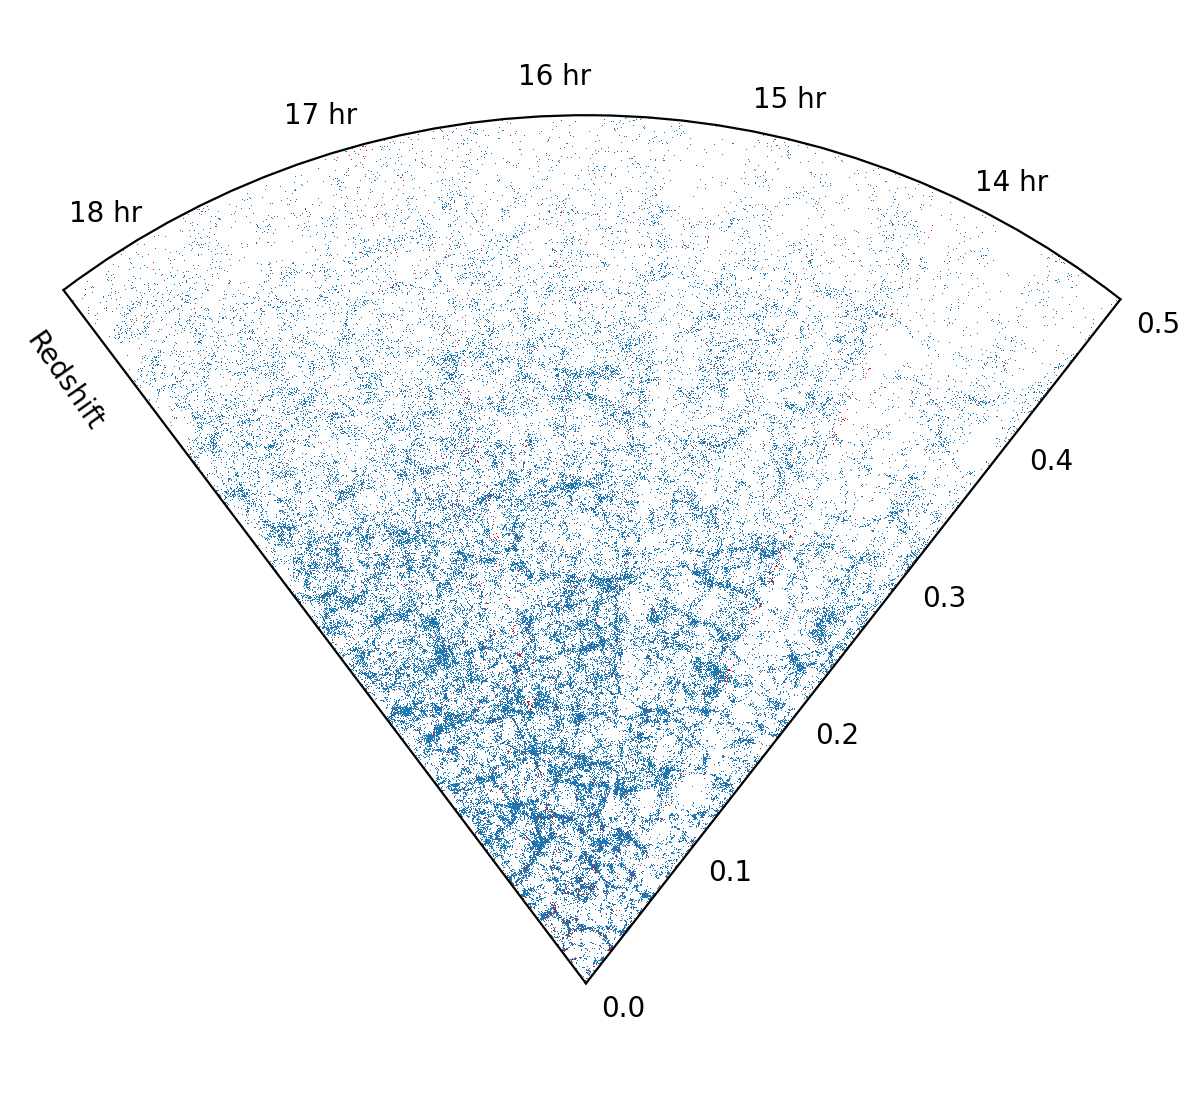

In [36]:
RA_rad = np.deg2rad(data_BGS['RA'])
RA_rad_faint = np.deg2rad(data_BGS_faint['RA'])
print(np.min(RA_rad),np.max(RA_rad))
"""
fig, ax = plt.subplots(figsize=(7,7),subplot_kw={'projection': 'polar'}, dpi=200)
plt.grid(False)
ax.set_xticks([np.deg2rad(210),np.deg2rad(225),np.deg2rad(240),np.deg2rad(255),np.deg2rad(270)])
ax.set_xticklabels(['14 hr', '15 hr', '16 hr', '17 hr', '18 hr'])
ax.plot(RA_rad[cone_cut],data_BGS['Z'][cone_cut], lw=0, marker=',')
#ax.plot(RA_rad_faint[cone_cut_faint],data_BGS_faint['Z'][cone_cut_faint], lw=0, marker=',', color='tab:orange')
ax.set_theta_offset(np.deg2rad(212))
plt.ylim(0,0.5)
plt.xlim(np.deg2rad(200),np.deg2rad(275))
plt.ylabel('Redshift', rotation=-55, y=0.65)
plt.savefig('project/figures/cone_plot_bright.png')

fig, ax = plt.subplots(figsize=(7,7),subplot_kw={'projection': 'polar'}, dpi=200)
plt.grid(False)
ax.set_xticks([np.deg2rad(210),np.deg2rad(225),np.deg2rad(240),np.deg2rad(255),np.deg2rad(270)])
ax.set_xticklabels(['14 hr', '15 hr', '16 hr', '17 hr', '18 hr'])
#ax.tick_params(axis='x', which='major', direction='out', length=5)
ax.plot(RA_rad_faint[cone_cut_faint],data_BGS_faint['Z'][cone_cut_faint], lw=0, marker=',')
ax.set_theta_offset(np.deg2rad(212))
plt.ylim(0,0.5)
plt.xlim(np.deg2rad(200),np.deg2rad(275))
plt.ylabel('Redshift', rotation=-55, y=0.65)
plt.savefig('project/figures/cone_plot_faint.png')"""

fig, ax = plt.subplots(figsize=(7,7),subplot_kw={'projection': 'polar'}, dpi=200)
plt.grid(False)
ax.set_xticks([np.deg2rad(210),np.deg2rad(225),np.deg2rad(240),np.deg2rad(255),np.deg2rad(270)])
ax.set_xticklabels(['14 hr', '15 hr', '16 hr', '17 hr', '18 hr'])
ax.plot(RA_rad_faint[cone_cut_faint_good],data_BGS_faint['Z'][cone_cut_faint_good], lw=0, marker=',', color='tab:blue')
ax.plot(RA_rad_faint[cone_cut_faint_bad],data_BGS_faint['Z'][cone_cut_faint_bad], lw=0, marker=',', color='red')
ax.plot(RA_rad[cone_cut_good],data_BGS['Z'][cone_cut_good], lw=0, marker=',', color='tab:blue')
ax.plot(RA_rad[cone_cut_bad],data_BGS['Z'][cone_cut_bad], lw=0, marker=',', color='red')
ax.set_theta_offset(np.deg2rad(212))
plt.ylim(0,0.5)
plt.xlim(np.deg2rad(200),np.deg2rad(275))
plt.ylabel('Redshift', rotation=-55, y=0.65)
plt.savefig('figures/week1/cone_plot_bright_faint.png')

In [ ]:
#vertical : >pi/2 => -pi
#horizontal : >pi => -2pi ?

plt.figure(figsize=(15,5),dpi=150)
plt.subplot(projection="mollweide")
plt.grid(True)
plt.scatter(np.deg2rad(data['TARGET_RA']-2*np.pi), np.deg2rad(data['TARGET_DEC']),s=0.01)
plt.show()

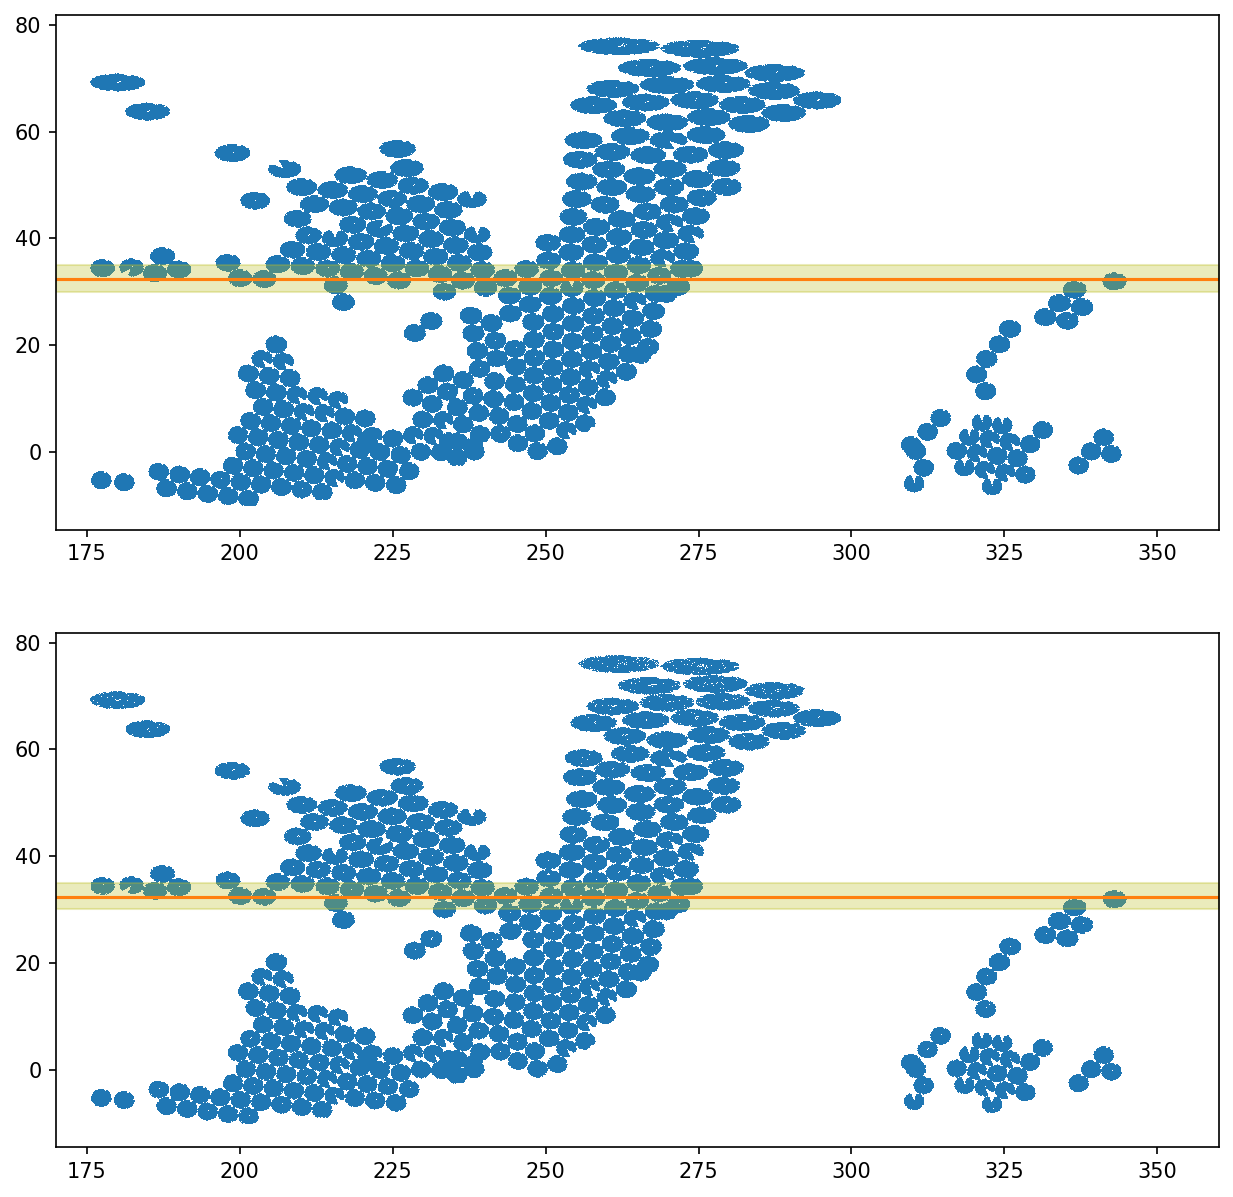

In [35]:
plt.figure(figsize=(10,10),dpi=150)
plt.subplot(211)
plt.plot(data['TARGET_RA'][photsys_valid], data['TARGET_DEC'][photsys_valid], lw=0.0, marker=',', zorder=0)
plt.plot([170,360],[32.375,32.375])
plt.fill_between([170,360],[35,35],[30,30], color='tab:olive',alpha=0.3, zorder=1)
plt.xlim(170,360)
plt.subplot(212)
plt.plot(data_BGS['RA'], data_BGS['DEC'], lw=0.0, marker=',', zorder=0)
plt.plot([170,360],[32.375,32.375])
plt.fill_between([170,360],[35,35],[30,30], color='tab:olive',alpha=0.3, zorder=1)
plt.xlim(170,360)
plt.savefig('figures/week1/allsky.png')

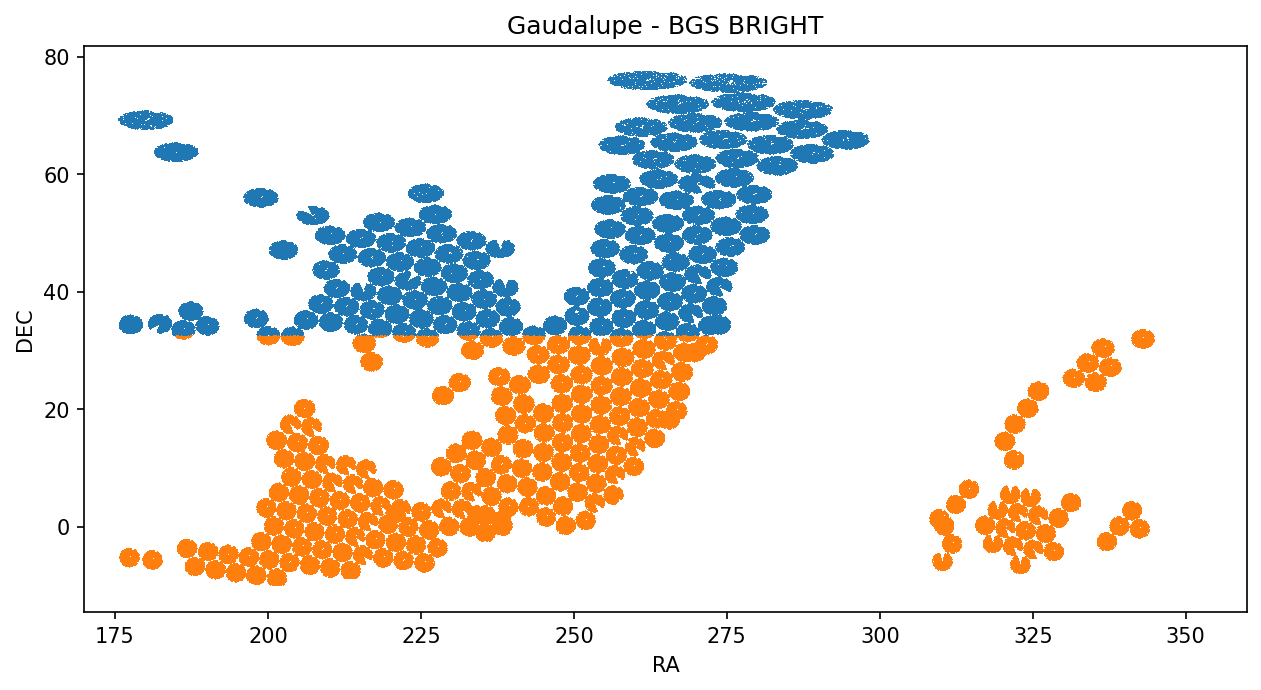

In [41]:
plt.figure(figsize=(10,5),dpi=150)
plt.plot(data_BGS['RA'][N], data_BGS['DEC'][N], lw=0.0, marker=',', zorder=0)
plt.plot(data_BGS['RA'][S], data_BGS['DEC'][S], lw=0.0, marker=',', zorder=0)
plt.xlim(170,360)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Gaudalupe - BGS BRIGHT')
plt.savefig('figures/week8-9/skycoverage_guadalupe_bright.png')